## 一. 从本地加载数据

In [1]:
import mnist_loader
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import struct

In [2]:
train_data, validation_data, test_data = mnist_loader.load_data_wrapper()

## 二. 查看数据格式

In [3]:
print (train_data[0].shape)
print (train_data[0][0])

(50000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


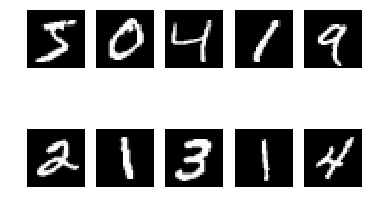

In [4]:
plt.figure()
for i in range(10):
    image = train_data[0][i]
    plt.subplot(2, 5, i+1)
    plt.imshow(image.reshape([28, 28]), cmap="gray")
    plt.axis('off')
    print(train_data[1][i])

### 或者直接利用tensorflow已经封装过的MNIST数据集

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [6]:
train, validation, test = mnist
print ("train data: " + str(train._num_examples))
print ("validation data: " + str(validation._num_examples))
print ("test data: " + str(test._num_examples))

train data: 55000
validation data: 5000
test data: 10000


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


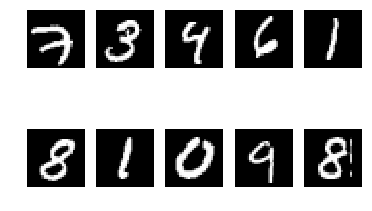

In [7]:
plt.figure()
for i in range(10):
    image = train._images[i]
    plt.subplot(2, 5, i+1)
    plt.imshow(image.reshape([28, 28]), cmap="gray")
    plt.axis('off')
    print(train._labels[i])

## 三. 深度神经网络框架使用

### 1. 模型构建 

In [8]:
x = tf.placeholder("float", shape=[None, 784])  # input data format
y = tf.placeholder("float", shape=[None, 10])   # output data format

In [9]:
# Input Layer
input_layer = tf.reshape(x, [-1,28,28,1])   # -1: caluculate according to other three parameters

In [10]:
# Convolutional Layer and Pooling Layer #1
conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)   # picture size: 14*14

In [11]:
# Convolutional Layer and Pooling Layer #2
conv2 = tf.layers.conv2d(
    inputs=pool1,
    filters=64,
    kernel_size=[5, 5],
    padding="same",
    activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)  # picture size: 7*7

In [12]:
# Dense Layer: the full connection layer
pool2_flat = tf.reshape(pool2, [-1, 7*7*64])
dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

In [13]:
# Dropout Layer: To avoid overfitting
dropout = tf.layers.dropout(inputs=dense, rate=0.4)

In [14]:
# Dense Layer: the output layer
output_layer = tf.layers.dense(inputs=dropout, units=10, activation=tf.nn.softmax)

### 2. 定义损失函数和训练模型

In [15]:
cross_entropy = -tf.reduce_sum(y * tf.log(output_layer))
# cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=output_layer)
optimizer = tf.train.AdamOptimizer(1e-4)   # adaptive moment estimation，自适应矩估计
train = optimizer.minimize(cross_entropy)

### 3. 定义测试模型计算准确率

In [16]:
correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))    # type: bool
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### 4. 训练模型

In [17]:
sess = tf.InteractiveSession()            # build session
tf.global_variables_initializer().run()       # initalize all the variables and run session

for i in range(3000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:         
        train_accuracy = accuracy.eval(feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
        print ("step %d, training accuracy %g"%(i, train_accuracy))
    train.run(feed_dict={x: batch[0], y: batch[1]})

# print final test accuracy
print ("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))

step 0, training accuracy 0.1106
step 100, training accuracy 0.8652
step 200, training accuracy 0.9068
step 300, training accuracy 0.9294
step 400, training accuracy 0.9504
step 500, training accuracy 0.9538
step 600, training accuracy 0.9628
step 700, training accuracy 0.966
step 800, training accuracy 0.9698
step 900, training accuracy 0.9732
step 1000, training accuracy 0.973
step 1100, training accuracy 0.9768
step 1200, training accuracy 0.9764
step 1300, training accuracy 0.9736
step 1400, training accuracy 0.9786
step 1500, training accuracy 0.9786
step 1600, training accuracy 0.979
step 1700, training accuracy 0.9822
step 1800, training accuracy 0.9824
step 1900, training accuracy 0.9824
step 2000, training accuracy 0.9832
step 2100, training accuracy 0.983
step 2200, training accuracy 0.9864
step 2300, training accuracy 0.9852
step 2400, training accuracy 0.9846
step 2500, training accuracy 0.9826
step 2600, training accuracy 0.9852
step 2700, training accuracy 0.986
step 2800

### 若使用本地数据，则可自行生成mini_batch

In [18]:
mini_batch_size = 50
mini_batches_x = np.array([train_data[0][k:k+mini_batch_size]for k in range(0, 50000, mini_batch_size)])
mini_batches_y = np.array([train_data[1][k:k+mini_batch_size]for k in range(0, 50000, mini_batch_size)])

In [19]:
mini_batches_x[0].shape

(50, 784)

### mnist_load.py 中代码具体实现 

In [20]:
def load_data():
    """ Used when data is in the form xx.idx3-ubyte. 
    Return training_data, validation_data and test_data in the form of tuple.
    
    The first entry is a numpy ndarray with 50,000/10,000/10,000
    entries respectively. And each entry is a numpy ndarray with
    784 values, representing the 28 * 28 = 784 pixels in a single
    MNIST image.

    The second entry is also a numpy ndarray with 50,000/10,000/10,000
    entries respectively. But each entry is the label of the corresponding
    image in the first entry. The label is a number between 0 and 9.
    """
    test_x = np.asarray(LoadImage("./MNIST_data/t10k-images.idx3-ubyte"), dtype="float32")
    test_y = np.asarray(LoadLabel("./MNIST_data/t10k-labels.idx1-ubyte"), dtype="int64")
    training_x = np.asarray(LoadImage("./MNIST_data/train-images.idx3-ubyte"), dtype="float32")
    training_y = np.asarray(LoadLabel("./MNIST_data/train-labels.idx1-ubyte"), dtype="int64")
    training_data = (training_x[:50000], training_y[:50000])
    validation_data = (training_x[50000:], training_y[50000:])
    test_data = (test_x, test_y)
    return (training_data, validation_data, test_data)

In [21]:
def load_data_wrapper():
    """ Modify the input data to use it for neural network more conveniently.
    Also return training data, validation data and test data 
    in the form of tuple.

    Each data is in the form of (x, y) where x is a 784*1 numpy.ndarray and 
    y is a 10*1 numpy.ndarray with 1 in the right position representing
    the label and 0 in the other 9 positions.
    """
    tr_d, va_d, te_d = load_data()
    training_x = np.asarray([np.reshape(x, (784, 1)) for x in tr_d[0]]).reshape(50000, 784)
    training_y = np.asarray([vactorize_y(y) for y in tr_d[1]]).reshape(50000, 10)
    training_data = (training_x, training_y)
    validation_x = np.asarray([np.reshape(x, (784, 1)) for x in va_d[0]]).reshape(10000, 784)
    validation_y = np.asarray([vactorize_y(y) for y in va_d[1]]).reshape(10000, 10)
    validation_data = (validation_x, validation_y)
    test_x = np.asarray([np.reshape(x, (784, 1)) for x in te_d[0]]).reshape(10000, 784)
    test_y = np.asarray([vactorize_y(y) for y in te_d[1]]).reshape(10000, 10)
    test_data = (test_x, test_y)
    return (training_data, validation_data, test_data)

In [22]:
def vactorize_y(j):
    """ Return a 10-dimentional vector with 1 in the jth position
    and 0 in the other position """
    vec = np.zeros((10, 1))
    vec[j] = 1
    return vec

In [23]:
def LoadImage(filename):
    """ Used for load_data, load image and return ndarray. """
    binaryfile = open(filename, 'rb')
    buffers = binaryfile.read()
    info = struct.unpack_from('>iiii', buffers)  # fmt: four 32 bit integer: magic number, number of images, rows, columns
    offset = struct.calcsize('>iiii')  # locate to 0016 where pixels start
                                       # fmt: '>': big-endian
    imgNum = info[1]        # 60000\10000
    rowNum = info[2]        # 28
    columnNum = info[3]     # 28
    
    pixels = imgNum * rowNum * columnNum
    imgFmt = '>' + str(pixels) + 'B'   # unsigned byte
    imgs = struct.unpack_from(imgFmt, buffers, offset)
    binaryfile.close()
    
    return np.reshape(imgs, [imgNum, rowNum*columnNum])   # 60000\10000 * 784

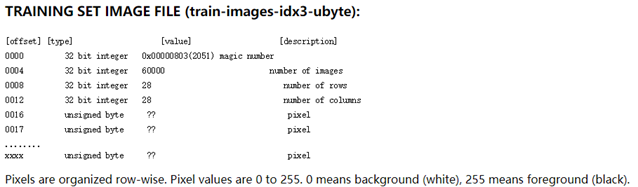

In [24]:
def LoadLabel(filename):
    """ Used for load_data, load label and return ndarray. """
    binaryfile = open(filename, 'rb')
    buffers = binaryfile.read()
    info = struct.unpack_from('>ii', buffers)  # fmt: two 32 bit integer: magic number, number of labels
    offset = struct.calcsize('>ii')  # locate to 0008 where label start
                                       # fmt: '>': big-endian
    labelNum = info[1]        # 60000\10000
    
    labelFmt = '>' + str(labelNum) + 'B'   # unsigned byte
    labels = struct.unpack_from(labelFmt, buffers, offset)
    binaryfile.close()
    
    return np.reshape(labels, [labelNum])   # 60000\10000 * 1

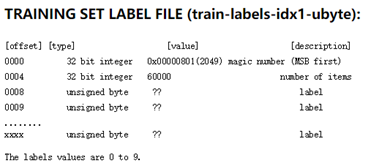